In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import itertools
import collections
import spacy
from pprint import pprint
import re

import matplotlib.pyplot as plt
import seaborn as sns
import pyLDAvis
import pyLDAvis.gensim_models

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.wrappers import LdaMallet

from nltk import bigrams
from nltk.stem import PorterStemmer

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [4]:
df = pd.read_pickle('pre-processed.pkl')

In [5]:
df.shape

(49458, 5)

In [6]:
df.head()

,tweet_text,tidy_tweet,tidy_tweet_tokens,tokens_no_stop,no_stop_joined
0,Islam is a religion full of blessings and good...,islam full blessings good deeds which also res...,"[islam, full, blessings, good, deeds, which, a...","[islam, full, blessings, good, deeds, also, re...",islam full blessings good deeds also respected...
1,@ wagner_claire Religion and pity are antonyms...,pity antonyms disaster other humanity live wit...,"[pity, antonyms, disaster, other, humanity, li...","[pity, antonyms, disaster, humanity, live, wit...",pity antonyms disaster humanity live without pity
2,if the only reason people are on twitter is to...,only reason people twitter argue about hitler ...,"[only, reason, people, twitter, argue, about, ...","[reason, people, argue, hitler, count]",reason people argue hitler count
3,Religion is needed to provide a moral compass ...,needed provide moral compass those lack empathy,"[needed, provide, moral, compass, those, lack,...","[needed, provide, moral, compass, lack, empathy]",needed provide moral compass lack empathy
4,plus my religion has never been 'holier' than ...,plus never been holier than regular life regul...,"[plus, never, been, holier, than, regular, lif...","[plus, never, holier, regular, life, regular, ...",plus never holier regular life regular life in...


In [7]:
df1 = df
df.head()

,tweet_text,tidy_tweet,tidy_tweet_tokens,tokens_no_stop,no_stop_joined
0,Islam is a religion full of blessings and good...,islam full blessings good deeds which also res...,"[islam, full, blessings, good, deeds, which, a...","[islam, full, blessings, good, deeds, also, re...",islam full blessings good deeds also respected...
1,@ wagner_claire Religion and pity are antonyms...,pity antonyms disaster other humanity live wit...,"[pity, antonyms, disaster, other, humanity, li...","[pity, antonyms, disaster, humanity, live, wit...",pity antonyms disaster humanity live without pity
2,if the only reason people are on twitter is to...,only reason people twitter argue about hitler ...,"[only, reason, people, twitter, argue, about, ...","[reason, people, argue, hitler, count]",reason people argue hitler count
3,Religion is needed to provide a moral compass ...,needed provide moral compass those lack empathy,"[needed, provide, moral, compass, those, lack,...","[needed, provide, moral, compass, lack, empathy]",needed provide moral compass lack empathy
4,plus my religion has never been 'holier' than ...,plus never been holier than regular life regul...,"[plus, never, been, holier, than, regular, lif...","[plus, never, holier, regular, life, regular, ...",plus never holier regular life regular life in...


In [8]:
def reg(str):
    if(re.search('islam', str) == None):
        return 0
    else:
        return 1

df1['islam'] = ""
for i in range(len(df1['tidy_tweet'])):
    df1['islam'][i] = reg(df1['tidy_tweet'][i])

In [9]:
df1.head()

,tweet_text,tidy_tweet,tidy_tweet_tokens,tokens_no_stop,no_stop_joined,islam
0,Islam is a religion full of blessings and good...,islam full blessings good deeds which also res...,"[islam, full, blessings, good, deeds, which, a...","[islam, full, blessings, good, deeds, also, re...",islam full blessings good deeds also respected...,1
1,@ wagner_claire Religion and pity are antonyms...,pity antonyms disaster other humanity live wit...,"[pity, antonyms, disaster, other, humanity, li...","[pity, antonyms, disaster, humanity, live, wit...",pity antonyms disaster humanity live without pity,0
2,if the only reason people are on twitter is to...,only reason people twitter argue about hitler ...,"[only, reason, people, twitter, argue, about, ...","[reason, people, argue, hitler, count]",reason people argue hitler count,0
3,Religion is needed to provide a moral compass ...,needed provide moral compass those lack empathy,"[needed, provide, moral, compass, those, lack,...","[needed, provide, moral, compass, lack, empathy]",needed provide moral compass lack empathy,0
4,plus my religion has never been 'holier' than ...,plus never been holier than regular life regul...,"[plus, never, been, holier, than, regular, lif...","[plus, never, holier, regular, life, regular, ...",plus never holier regular life regular life in...,0


In [10]:
df2 = df1.loc[df1['islam'] != 0]
df2
df2 = df2.drop(['islam'], axis=1)
df2.to_pickle('df_islam.pkl')

In [11]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in df['tokens_no_stop']]

# View bigrams for the first tweet
terms_bigram[0]

[('islam', 'full'),
 ('full', 'blessings'),
 ('blessings', 'good'),
 ('good', 'deeds'),
 ('deeds', 'also'),
 ('also', 'respected'),
 ('respected', 'lives'),
 ('lives', 'well'),
 ('well', 'blood'),
 ('blood', 'fact'),
 ('fact', 'islam')]

In [12]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

In [13]:
bigram_df = pd.DataFrame(bigram_counts.most_common(25), columns=['bigram', 'count'])

In [14]:
len(bigram_counts)

346534

In [15]:
bigram_df.head(25)

,bigram,count
0,"(islam, peace)",631
1,"(climate, change)",268
2,"(church, state)",261
3,"(mark, zuckerberg)",257
4,"(zuckerberg, says)",256
5,"(atheist, believes)",253
6,"(separation, church)",208
7,"(longer, atheist)",207
8,"(says, longer)",205
9,"(race, gender)",189


Number of Bigrams Identified 25


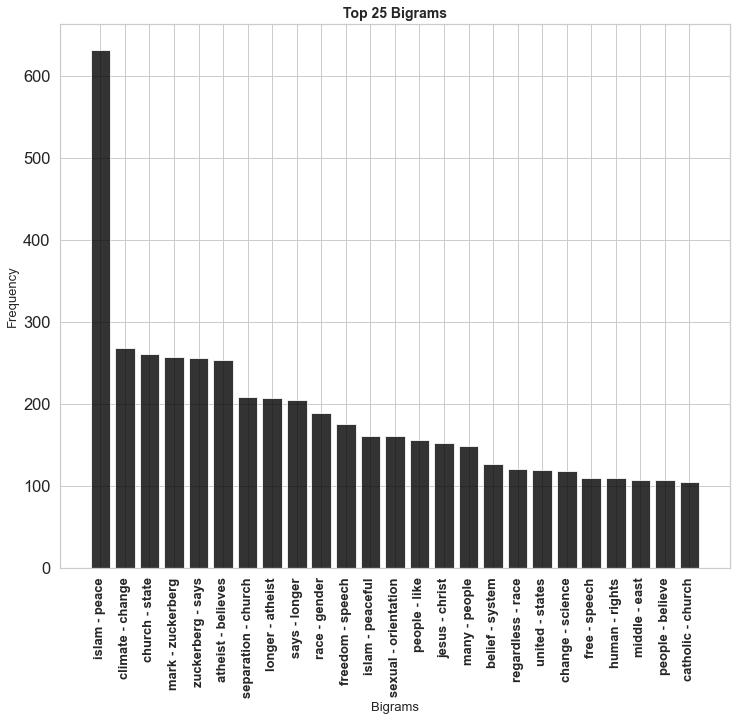

In [16]:
bigram_label = ['islam - peace','climate - change', 'church - state', 'mark - zuckerberg','zuckerberg - says', 'atheist - believes',
               'separation - church', 'longer - atheist', 'says - longer', 'race - gender',
               'freedom - speech', 'islam - peaceful', 'sexual - orientation', 'people - like', 'jesus - christ',
               'many - people', 'belief - system', 'regardless - race', 'united - states', 'change - science', 
               'free - speech', 'human - rights', 'middle - east','people - believe', 'catholic - church']
bigram_freq = bigram_df['count'].head(25)
index = np.arange(len(bigram_freq))

print("Number of Bigrams Identified", len(bigram_df))
plt.figure(figsize=(12,10))
plt.bar(index, bigram_freq, alpha=0.8, color= 'black')
plt.xlabel('Bigrams', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.xticks(index, bigram_label, fontsize=13, rotation=90, fontweight="bold") 
plt.title('Top 25 Bigrams', fontsize=14, fontweight="bold")
plt.show()

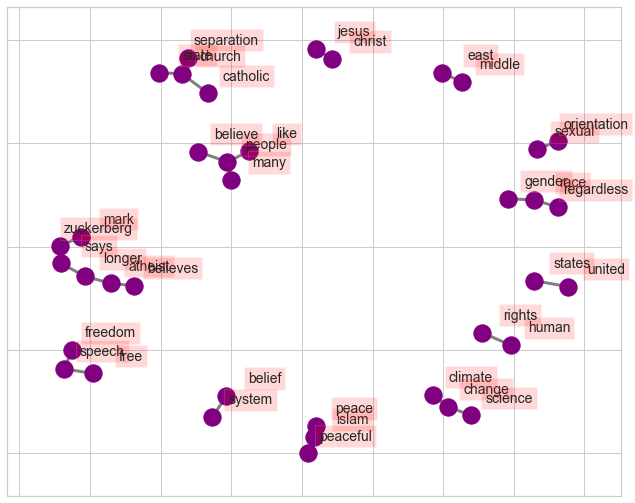

In [17]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 5))

fig, ax = plt.subplots(figsize=(11, 9))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.065
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.15),
            horizontalalignment='center', fontsize=14)
    
plt.show()

In [18]:
data = df.no_stop_joined.values.tolist()

In [19]:
print(data[:1])

['islam full blessings good deeds also respected lives well blood fact islam']


In [20]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [21]:
data_words = list(sent_to_words(data))

print(data_words[:1])

[['islam', 'full', 'blessings', 'good', 'deeds', 'also', 'respected', 'lives', 'well', 'blood', 'fact', 'islam']]


In [22]:
# Build the bigram and trigram model
bigram = gensim.models.Phrases(data_words, min_count=10, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [23]:
# See trigram example
print(trigram_mod[bigram_mod[data_words[5]]])

['impotence', 'human', 'mind', 'deal', 'occurrences', 'cannot', 'understand', 'karl_marx']


In [24]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [25]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

In [26]:
def lemmatization(tweets, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    tweets_out = []
    for sent in tweets:
        doc = nlp(" ".join(sent)) 
        tweets_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return tweets_out

In [27]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [28]:
df['lemmatized'] = pd.Series(lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']))

In [29]:
df

,tweet_text,tidy_tweet,tidy_tweet_tokens,tokens_no_stop,no_stop_joined,islam,lemmatized
0,Islam is a religion full of blessings and good...,islam full blessings good deeds which also res...,"[islam, full, blessings, good, deeds, which, a...","[islam, full, blessings, good, deeds, also, re...",islam full blessings good deeds also respected...,1,"[full, blessing, good, deed, also, respect, li..."
1,@ wagner_claire Religion and pity are antonyms...,pity antonyms disaster other humanity live wit...,"[pity, antonyms, disaster, other, humanity, li...","[pity, antonyms, disaster, humanity, live, wit...",pity antonyms disaster humanity live without pity,0,"[disaster, humanity, live, pity]"
2,if the only reason people are on twitter is to...,only reason people twitter argue about hitler ...,"[only, reason, people, twitter, argue, about, ...","[reason, people, argue, hitler, count]",reason people argue hitler count,0,"[reason, people, argue, count]"
3,Religion is needed to provide a moral compass ...,needed provide moral compass those lack empathy,"[needed, provide, moral, compass, those, lack,...","[needed, provide, moral, compass, lack, empathy]",needed provide moral compass lack empathy,0,"[need, provide, moral_compass, lack, empathy]"
4,plus my religion has never been 'holier' than ...,plus never been holier than regular life regul...,"[plus, never, been, holier, than, regular, lif...","[plus, never, holier, regular, life, regular, ...",plus never holier regular life regular life in...,0,"[never, holier, regular, life, regular, life, ..."
...,...,...,...,...,...,...,...
49453,Now all you have is programs of religion being...,have programs being split into separate linked...,"[have, programs, being, split, into, separate,...","[programs, split, separate, linked, cults, pro...",programs split separate linked cults prostitut...,0,"[program, split, separate, link, cult, prostit..."
49454,Morality is defined by conscience rather than ...,morality defined conscience rather than,"[morality, defined, conscience, rather, than]","[morality, defined, conscience, rather]",morality defined conscience rather,0,"[morality, define, conscience, rather]"
49455,Persecution of vulnerable minorities can be as...,persecution vulnerable minorities much functio...,"[persecution, vulnerable, minorities, much, fu...","[persecution, vulnerable, minorities, much, fu...",persecution vulnerable minorities much functio...,0,"[persecution, vulnerable, minority, much, func..."
49456,With his clerical fascism. Though the Catholic...,with clerical fascism though catholic church b...,"[with, clerical, fascism, though, catholic, ch...","[clerical, fascism, though, catholic, church, ...",clerical fascism though catholic church becomi...,0,"[clerical, fascism, catholic, church, become, ..."


In [30]:
# Join the tweet back together
def rejoin_words(row):
    words = row['lemmatized']
    joined_words = (" ".join(words))
    return joined_words

In [31]:
df['lemmatized_joined'] = df.apply(rejoin_words, axis=1)

In [36]:
df = df.drop_duplicates(subset=['lemmatized_joined'], keep='first', inplace=False)

In [37]:
df.shape

(47347, 8)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47347 entries, 0 to 49457
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet_text         47347 non-null  object
 1   tidy_tweet         47347 non-null  object
 2   tidy_tweet_tokens  47347 non-null  object
 3   tokens_no_stop     47347 non-null  object
 4   no_stop_joined     47347 non-null  object
 5   islam              47347 non-null  object
 6   lemmatized         47347 non-null  object
 7   lemmatized_joined  47347 non-null  object
dtypes: object(8)
memory usage: 3.3+ MB


In [39]:
stemmer = PorterStemmer()

In [40]:
df['stemmed'] = df['lemmatized'].apply(lambda x : [stemmer.stem(y) for y in x])

In [41]:
df

,tweet_text,tidy_tweet,tidy_tweet_tokens,tokens_no_stop,no_stop_joined,islam,lemmatized,lemmatized_joined,stemmed
0,Islam is a religion full of blessings and good...,islam full blessings good deeds which also res...,"[islam, full, blessings, good, deeds, which, a...","[islam, full, blessings, good, deeds, also, re...",islam full blessings good deeds also respected...,1,"[full, blessing, good, deed, also, respect, li...",full blessing good deed also respect life well...,"[full, bless, good, deed, also, respect, life,..."
1,@ wagner_claire Religion and pity are antonyms...,pity antonyms disaster other humanity live wit...,"[pity, antonyms, disaster, other, humanity, li...","[pity, antonyms, disaster, humanity, live, wit...",pity antonyms disaster humanity live without pity,0,"[disaster, humanity, live, pity]",disaster humanity live pity,"[disast, human, live, piti]"
2,if the only reason people are on twitter is to...,only reason people twitter argue about hitler ...,"[only, reason, people, twitter, argue, about, ...","[reason, people, argue, hitler, count]",reason people argue hitler count,0,"[reason, people, argue, count]",reason people argue count,"[reason, peopl, argu, count]"
3,Religion is needed to provide a moral compass ...,needed provide moral compass those lack empathy,"[needed, provide, moral, compass, those, lack,...","[needed, provide, moral, compass, lack, empathy]",needed provide moral compass lack empathy,0,"[need, provide, moral_compass, lack, empathy]",need provide moral_compass lack empathy,"[need, provid, moral_compass, lack, empathi]"
4,plus my religion has never been 'holier' than ...,plus never been holier than regular life regul...,"[plus, never, been, holier, than, regular, lif...","[plus, never, holier, regular, life, regular, ...",plus never holier regular life regular life in...,0,"[never, holier, regular, life, regular, life, ...",never holier regular life regular life include...,"[never, holier, regular, life, regular, life, ..."
...,...,...,...,...,...,...,...,...,...
49453,Now all you have is programs of religion being...,have programs being split into separate linked...,"[have, programs, being, split, into, separate,...","[programs, split, separate, linked, cults, pro...",programs split separate linked cults prostitut...,0,"[program, split, separate, link, cult, prostit...",program split separate link cult prostitution ...,"[program, split, separ, link, cult, prostitut,..."
49454,Morality is defined by conscience rather than ...,morality defined conscience rather than,"[morality, defined, conscience, rather, than]","[morality, defined, conscience, rather]",morality defined conscience rather,0,"[morality, define, conscience, rather]",morality define conscience rather,"[moral, defin, conscienc, rather]"
49455,Persecution of vulnerable minorities can be as...,persecution vulnerable minorities much functio...,"[persecution, vulnerable, minorities, much, fu...","[persecution, vulnerable, minorities, much, fu...",persecution vulnerable minorities much functio...,0,"[persecution, vulnerable, minority, much, func...",persecution vulnerable minority much function ...,"[persecut, vulner, minor, much, function, auth..."
49456,With his clerical fascism. Though the Catholic...,with clerical fascism though catholic church b...,"[with, clerical, fascism, though, catholic, ch...","[clerical, fascism, though, catholic, church, ...",clerical fascism though catholic church becomi...,0,"[clerical, fascism, catholic, church, become, ...",clerical fascism catholic church become white ...,"[cleric, fascism, cathol, church, becom, white..."


In [42]:
# Create Dictionary
id2word_stemmed = corpora.Dictionary(df['stemmed'])

In [43]:
# Create Dictionary
id2word_lemma = corpora.Dictionary(df['tokens_no_stop'])

In [44]:
# Create Dictionary
id2word_tidy = corpora.Dictionary(df['tidy_tweet_tokens'])

In [45]:
print(id2word_stemmed)

Dictionary(20880 unique tokens: ['also', 'bless', 'blood', 'deed', 'fact']...)


In [46]:
print(id2word_lemma)

Dictionary(37100 unique tokens: ['also', 'blessings', 'blood', 'deeds', 'fact']...)


In [47]:
print(id2word_tidy)

Dictionary(37184 unique tokens: ['also', 'blessings', 'blood', 'deeds', 'fact']...)


In [48]:
# Create Corpus
tweets_stemmed = df['stemmed']

In [49]:
df['stemmed'][1]

['disast', 'human', 'live', 'piti']

In [50]:
df['tweet_text'][1]

'@ wagner_claire Religion and pity are antonyms. One is disaster, other is humanity. We can live without religion but not pity. Yet we hug ...'

In [51]:
df.to_pickle('processed.pkl')

In [52]:
tweets_stemmed

0        [full, bless, good, deed, also, respect, life,...
1                              [disast, human, live, piti]
2                             [reason, peopl, argu, count]
3             [need, provid, moral_compass, lack, empathi]
4        [never, holier, regular, life, regular, life, ...
                               ...                        
49453    [program, split, separ, link, cult, prostitut,...
49454                    [moral, defin, conscienc, rather]
49455    [persecut, vulner, minor, much, function, auth...
49456    [cleric, fascism, cathol, church, becom, white...
49457    [problem, mani, sjw, treat, fanat, peopl, norm...
Name: stemmed, Length: 47347, dtype: object

In [53]:
# Term Document Frequency
corpus_stemmed = [id2word_stemmed.doc2bow(tweet) for tweet in tweets_stemmed]

In [54]:
print(len(corpus_stemmed))

47347


In [55]:
print(corpus_stemmed[480])

[(12, 1), (127, 1), (136, 1), (369, 1), (477, 1), (605, 1), (994, 1), (1310, 1)]


In [56]:
# Human readable format of corpus (term-frequency)
[[(id2word_stemmed[id], freq) for id, freq in cp] for cp in corpus_stemmed[:3]]

[[('also', 1),
  ('bless', 1),
  ('blood', 1),
  ('deed', 1),
  ('fact', 1),
  ('full', 1),
  ('good', 1),
  ('life', 1),
  ('respect', 1),
  ('well', 1)],
 [('disast', 1), ('human', 1), ('live', 1), ('piti', 1)],
 [('argu', 1), ('count', 1), ('peopl', 1), ('reason', 1)]]

In [57]:
# Build LDA model
lda_model_stemmed = gensim.models.ldamodel.LdaModel(corpus=corpus_stemmed,
                                           id2word=id2word_stemmed,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=15,
                                           alpha='auto',
                                           per_word_topics=True)

In [58]:
pprint(lda_model_stemmed.print_topics())
doc_lda_stemmed = lda_model_stemmed[corpus_stemmed]

[(0,
  '0.052*"love" + 0.044*"realli" + 0.039*"live" + 0.036*"understand" + '
  '0.030*"care" + 0.028*"peac" + 0.028*"organ" + 0.028*"real" + '
  '0.020*"societi" + 0.017*"fuck"'),
 (1,
  '0.156*"peopl" + 0.062*"know" + 0.039*"hate" + 0.031*"race" + 0.028*"call" + '
  '0.026*"tell" + 0.021*"keep" + 0.018*"stop" + 0.016*"forc" + 0.015*"money"'),
 (2,
  '0.089*"believ" + 0.038*"also" + 0.035*"never" + 0.029*"problem" + '
  '0.025*"fact" + 0.024*"year" + 0.023*"becom" + 0.020*"power" + '
  '0.020*"respect" + 0.019*"group"'),
 (3,
  '0.043*"christian" + 0.042*"think" + 0.041*"make" + 0.032*"right" + '
  '0.024*"go" + 0.021*"come" + 0.020*"take" + 0.017*"follow" + 0.017*"time" + '
  '0.016*"much"'),
 (4,
  '0.037*"use" + 0.035*"true" + 0.032*"other" + 0.025*"scienc" + 0.023*"long" '
  '+ 0.022*"kill" + 0.021*"word" + 0.019*"chang" + 0.019*"exist" + '
  '0.018*"evil"'),
 (5,
  '0.053*"human" + 0.037*"talk" + 0.037*"woman" + 0.031*"child" + 0.031*"find" '
  '+ 0.026*"truth" + 0.026*"tri" + 0.

In [59]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_stemmed.log_perplexity(corpus_stemmed))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda_stemmed = CoherenceModel(model=lda_model_stemmed, texts=df['stemmed'], dictionary=id2word_stemmed, coherence='c_v')
coherence_lda_stemmed = coherence_model_lda_stemmed.get_coherence()
print('\nCoherence Score: ', coherence_lda_stemmed)


Perplexity:  -8.534262989899496

Coherence Score:  0.24746179824223366


In [60]:
num_topics = 8
mallet_path = "C:/mallet/mallet-2.0.8/bin/mallet.bat" # update this path
ldamallet_stemmed = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus_stemmed, num_topics=num_topics, id2word=id2word_stemmed)

In [61]:
# Compute Coherence Score
coherence_model_ldamallet_stemmed = CoherenceModel(model=ldamallet_stemmed, texts=df['stemmed'], dictionary=id2word_stemmed, coherence='c_v')
coherence_ldamallet_stemmed = coherence_model_ldamallet_stemmed.get_coherence()
print('\nCoherence Score (Stemmed): ', coherence_ldamallet_stemmed)


Coherence Score (Stemmed):  0.3122162975855654


In [62]:
# Visualize the topics
pyLDAvis.enable_notebook()
visualisation = pyLDAvis.gensim_models.prepare(lda_model_stemmed, corpus_stemmed, id2word_stemmed)

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [63]:
visualisation

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.451335 -0.016092       1        1  19.394853
6     -0.035271 -0.124012       2        1  11.724070
1     -0.030113  0.437874       3        1  11.344524
8     -0.046454 -0.055820       4        1   9.607577
2     -0.048084 -0.055478       5        1   9.388172
9     -0.054425 -0.048943       6        1   8.695833
4     -0.059524 -0.042525       7        1   8.567525
0     -0.059602 -0.030837       8        1   7.311418
5     -0.059159 -0.031360       9        1   7.212216
7     -0.058702 -0.032808      10        1   6.753811, topic_info=            Term         Freq        Total Category  logprob  loglift
16         peopl  7411.000000  7411.000000  Default  30.0000  30.0000
200       believ  3499.000000  3499.000000  Default  29.0000  29.0000
184          say  3023.000000  3023.000000  Default  28.0000  28.0000
303         know  2943.000000  2943.000000  Default  27.0000  27.0000
61     christian  3479.000000  3479.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
859   particular   226.638822   227.333388  Topic10  -4.8258   2.6920
629         easi   225.325843   226.020435  Topic10  -4.8316   2.6920
1293     doctrin   220.319429   221.014030  Topic10  -4.8541   2.6919
1338        save   216.712449   217.407002  Topic10  -4.8706   2.6919
2032        myth   216.686301   217.380940  Topic10  -4.8707   2.6919

[330 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
778       2  0.998538  absolut
636       1  0.999692   accept
1135      9  0.998934   action
114       3  0.998852    activ
409       1  0.999316   actual
...     ...       ...      ...
95        2  0.999652    world
898       5  0.998924  worship
1341      7  0.997607    write
96        1  0.999458    wrong
1163      5  0.999781     year

[300 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 7, 2, 9, 3, 10, 5, 1, 6, 8])

In [64]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus_stemmed, num_topics=num_topics, id2word=id2word_stemmed)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [65]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word_stemmed, corpus=corpus_stemmed, texts=df['stemmed'], start=2, limit=26, step=3)

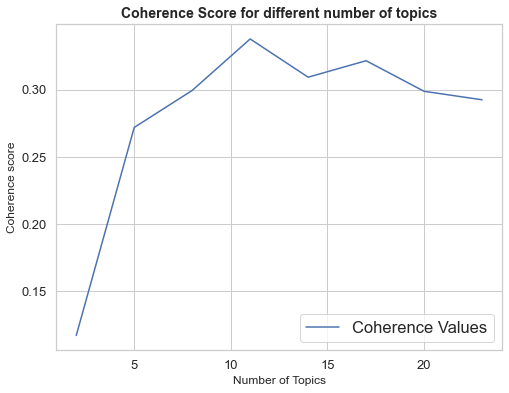

In [66]:
# Show graph
limit=26; start=2; step=3;
x = range(start, limit, step)
plt.figure(figsize=(8,6))
plt.plot(x, coherence_values)
plt.title('Coherence Score for different number of topics', fontsize=14, fontweight="bold")
plt.xlabel("Number of Topics", fontsize=12)
plt.ylabel("Coherence score", fontsize=12)
plt.tick_params(axis='both', labelsize=13)
plt.legend(["Coherence Values"], loc='lower right')
plt.show()

In [67]:
# Print the coherence scores for different number of topics
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.117
Num Topics = 5  has Coherence Value of 0.272
Num Topics = 8  has Coherence Value of 0.2996
Num Topics = 11  has Coherence Value of 0.338
Num Topics = 14  has Coherence Value of 0.3095
Num Topics = 17  has Coherence Value of 0.3218
Num Topics = 20  has Coherence Value of 0.299
Num Topics = 23  has Coherence Value of 0.2927


In [68]:
# Select the model and print the topics
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.030*"time" + 0.029*"cultur" + 0.021*"part" + 0.016*"control" + '
  '0.015*"chang" + 0.015*"power" + 0.015*"reason" + 0.014*"issu" + '
  '0.013*"import" + 0.013*"spiritu"'),
 (1,
  '0.066*"believ" + 0.033*"faith" + 0.031*"true" + 0.029*"belief" + '
  '0.028*"wrong" + 0.025*"scienc" + 0.023*"teach" + 0.020*"fact" + '
  '0.019*"actual" + 0.018*"real"'),
 (2,
  '0.052*"thing" + 0.049*"good" + 0.035*"make" + 0.027*"realli" + 0.021*"talk" '
  '+ 0.017*"feel" + 0.015*"evil" + 0.014*"show" + 0.013*"cult" + '
  '0.013*"becom"'),
 (3,
  '0.045*"race" + 0.035*"differ" + 0.034*"person" + 0.030*"base" + '
  '0.028*"woman" + 0.021*"matter" + 0.020*"respect" + 0.017*"give" + '
  '0.016*"peopl" + 0.015*"care"'),
 (4,
  '0.059*"christian" + 0.025*"call" + 0.021*"practic" + 0.019*"point" + '
  '0.017*"truth" + 0.017*"tri" + 0.015*"happen" + 0.013*"worship" + '
  '0.013*"long" + 0.013*"organ"'),
 (5,
  '0.044*"polit" + 0.037*"countri" + 0.037*"freedom" + 0.036*"hate" + '
  '0.027*"state" + 0.02

In [69]:
def format_topics_sentences(ldamodel=ldamallet_stemmed, corpus=corpus_stemmed, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each documen
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus_stemmed, texts=df['stemmed'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(15)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,6.0,0.1537,"love, world, human, life, peac, live, work, gr...","[full, bless, good, deed, also, respect, life,..."
1,1,6.0,0.1528,"love, world, human, life, peac, live, work, gr...","[disast, human, live, piti]"
2,2,7.0,0.1672,"peopl, mani, kill, problem, follow, church, ma...","[reason, peopl, argu, count]"
3,3,6.0,0.1548,"love, world, human, life, peac, live, work, gr...","[need, provid, moral_compass, lack, empathi]"
4,4,4.0,0.1568,"christian, call, practic, point, truth, tri, h...","[never, holier, regular, life, regular, life, ..."
5,5,2.0,0.1453,"thing, good, make, realli, talk, feel, evil, s...","[impot, human, mind, deal, occurr, understand]"
6,6,0.0,0.1343,"time, cultur, part, control, chang, power, rea...","[other, do, univers, matter, cultur, belief_sy..."
7,7,4.0,0.1417,"christian, call, practic, point, truth, tri, h...","[principl, follow, ahimsa, satyagraha, expel, ..."
8,8,2.0,0.1533,"thing, good, make, realli, talk, feel, evil, s...","[whole, peac, thing, start, make, trend, trust]"
9,9,0.0,0.1528,"time, cultur, part, control, chang, power, rea...","[fall, love, creat, fallibl]"


In [70]:
df_dominant_topic[df_dominant_topic.Dominant_Topic == 7.0]

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
2,2,7.0,0.1672,"peopl, mani, kill, problem, follow, church, ma...","[reason, peopl, argu, count]"
11,11,7.0,0.1452,"peopl, mani, kill, problem, follow, church, ma...","[muslim, fault, fault]"
19,19,7.0,0.1626,"peopl, mani, kill, problem, follow, church, ma...","[victim, obvious, guilt, associ, teach, moral,..."
20,20,7.0,0.1533,"peopl, mani, kill, problem, follow, church, ma...","[mani, peopl, identifi, pray, first, activ, wake]"
39,39,7.0,0.2110,"peopl, mani, kill, problem, follow, church, ma...","[jihad, lurch, feel, affin, forefath, land, be..."
...,...,...,...,...,...
47321,47321,7.0,0.1533,"peopl, mani, kill, problem, follow, church, ma...","[unfortun, fail, understand, explain, strongli..."
47333,47333,7.0,0.1542,"peopl, mani, kill, problem, follow, church, ma...","[believ, almost, sound]"
47337,47337,7.0,0.1436,"peopl, mani, kill, problem, follow, church, ma...","[even, close, say, need, educ, set, right, han..."
47344,47344,7.0,0.1654,"peopl, mani, kill, problem, follow, church, ma...","[interest, republican, state, want, restrict, ..."


In [71]:
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
topic_contribution = topic_contribution.rename_axis('Dominant_Topic').reset_index(name='percentage')

topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']].drop_duplicates()
topic_num_keywords.index = range(len(topic_num_keywords))

df_dominant_topics = pd.merge(topic_contribution, topic_num_keywords, how='inner', on='Dominant_Topic')
df_dominant_topics

,Dominant_Topic,percentage,Topic_Keywords
0,1.0,0.1515,"believ, faith, true, belief, wrong, scienc, te..."
1,0.0,0.1485,"time, cultur, part, control, chang, power, rea..."
2,2.0,0.1372,"thing, good, make, realli, talk, feel, evil, s..."
3,5.0,0.1270,"polit, countri, freedom, hate, state, muslim, ..."
4,3.0,0.1225,"race, differ, person, base, woman, matter, res..."
5,4.0,0.1107,"christian, call, practic, point, truth, tri, h..."
6,6.0,0.1088,"love, world, human, life, peac, live, work, gr..."
7,7.0,0.0938,"peopl, mani, kill, problem, follow, church, ma..."


In [72]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.2808,"time, cultur, part, control, chang, power, rea...","[want, kind, fact, sexism, immor, immor, semin..."
1,1.0,0.3020,"believ, faith, true, belief, wrong, scienc, te...","[bare, face, cheek, western, nation, want, dom..."
2,2.0,0.2791,"thing, good, make, realli, talk, feel, evil, s...","[actual, wrong, peopl, talk, polit, hell]"
3,3.0,0.2870,"race, differ, person, base, woman, matter, res...","[well, know, least, worship, brother, discipl,..."
4,4.0,0.2749,"christian, call, practic, point, truth, tri, h...","[popular, planet, today, teach, write, book, c..."
5,5.0,0.3194,"polit, countri, freedom, hate, state, muslim, ...","[process, let, difficult, depend, import, requ..."
6,6.0,0.2852,"love, world, human, life, peac, live, work, gr...","[accord, make, destroy, earth, pollut, creat, ..."
7,7.0,0.2645,"peopl, mani, kill, problem, follow, church, ma...","[say, cool, entir]"


In [73]:
print(sent_topics_sorteddf_mallet['Text'][6])

['accord', 'make', 'destroy', 'earth', 'pollut', 'creat', 'climate_chang', 'destroy', 'earth', 'complet', 'realis', 'give', 'oppertun', 'learn', 'correct', 'rememb', 'good']


In [74]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = sent_topics_sorteddf_mallet[['Topic_Num', 'Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts.sort_index(), topic_contribution.sort_index()], axis=1)

# Change Column names
df_dominant_topics.columns = ['Topic', 'Topic_Keywords', 'Num_Tweets', 'Perc_Tweets']

# Show
df_dominant_topics['Perc_Tweets'] = df_dominant_topics['Perc_Tweets'] * 100

In [75]:
df_dominant_topics['Text'] = sent_topics_sorteddf_mallet['Text']

In [76]:
df_dominant_topics

,Topic,Topic_Keywords,Num_Tweets,Perc_Tweets,Text
0.0,0.0,"time, cultur, part, control, chang, power, rea...",7033,14.85,"[want, kind, fact, sexism, immor, immor, semin..."
1.0,1.0,"believ, faith, true, belief, wrong, scienc, te...",7175,15.15,"[bare, face, cheek, western, nation, want, dom..."
2.0,2.0,"thing, good, make, realli, talk, feel, evil, s...",6494,13.72,"[actual, wrong, peopl, talk, polit, hell]"
3.0,3.0,"race, differ, person, base, woman, matter, res...",5801,12.25,"[well, know, least, worship, brother, discipl,..."
4.0,4.0,"christian, call, practic, point, truth, tri, h...",5240,11.07,"[popular, planet, today, teach, write, book, c..."
5.0,5.0,"polit, countri, freedom, hate, state, muslim, ...",6012,12.70,"[process, let, difficult, depend, import, requ..."
6.0,6.0,"love, world, human, life, peac, live, work, gr...",5150,10.88,"[accord, make, destroy, earth, pollut, creat, ..."
7.0,7.0,"peopl, mani, kill, problem, follow, church, ma...",4442,9.38,"[say, cool, entir]"


Total Tweets 47347


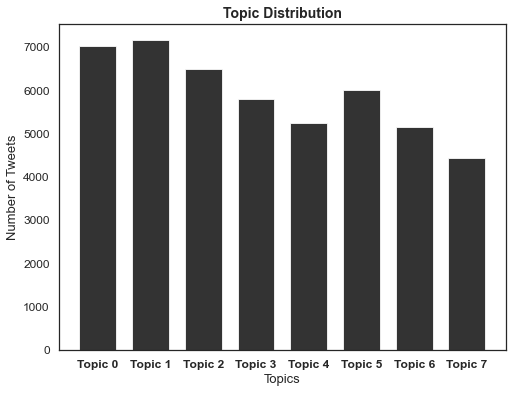

In [77]:
sns.set_style("white")
label = ['Topic 0', 'Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7']
freq = df_dominant_topics['Num_Tweets']
index = np.arange(len(freq))

print("Total Tweets", df_dominant_topics['Num_Tweets'].sum())
plt.figure(figsize=(8,6), facecolor='white')
plt.bar(index, freq, alpha=0.8, color= 'black', width=0.7)
plt.xlabel('Topics', fontsize=13)
plt.ylabel('Number of Tweets', fontsize=13)
plt.xticks(index, label, fontsize=11, fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('Topic Distribution', fontsize=14, fontweight="bold")
plt.show()

In [78]:
df_dominant_topics.to_pickle('topic_modelling_gensim_results.pkl')